In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('F:/ml-data/bj-pm25/PRSA_data_2010.1.1-2014.12.31.csv', header=0, index_col= 0)
data.head()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
No,,,,,,,,,,,,
1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [3]:
data.describe()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,41757.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,2012.000000,6.523549,15.727820,11.500000,98.613215,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,1.413842,3.448572,8.799425,6.922266,92.050387,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,2011.000000,4.000000,8.000000,5.750000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,2013.000000,10.000000,23.000000,17.250000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


In [4]:
values = data.values
values

array([[2010, 1, 1, ..., 1.79, 0, 0],
       [2010, 1, 1, ..., 4.92, 0, 0],
       [2010, 1, 1, ..., 6.71, 0, 0],
       ...,
       [2014, 12, 31, ..., 242.7, 0, 0],
       [2014, 12, 31, ..., 246.72, 0, 0],
       [2014, 12, 31, ..., 249.85, 0, 0]], dtype=object)

In [5]:
data.shape

(43824, 12)

In [6]:
values.shape

(43824, 12)

## 数据处理

In [7]:
from datetime import datetime
## 时间转换  yyyy mm dd HH24
def parse(x):
    return datetime.strptime(x, '%Y %m %d %H')

In [8]:
dataset = pd.read_csv('F:/ml-data/bj-pm25/PRSA_data_2010.1.1-2014.12.31.csv', parse_dates = [['year', 'month', 'day', 'hour']])
dataset.head()

,year_month_day_hour,No,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,2010 1 1 0,1,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2010 1 1 1,2,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,2010 1 1 2,3,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,2010 1 1 3,4,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,2010 1 1 4,5,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [9]:
dataset.drop('No', axis = 1, inplace=True) # 删除No列
dataset.head()

,year_month_day_hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,2010 1 1 0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2010 1 1 1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,2010 1 1 2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,2010 1 1 3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,2010 1 1 4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [10]:
dataset.columns = ['date', 'pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']
dataset.index.name = 'date'
dataset.head()

,date,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,,
0,2010 1 1 0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2010 1 1 1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,2010 1 1 2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,2010 1 1 3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,2010 1 1 4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [11]:
## pollution空值处理
dataset['pollution'].fillna(0, inplace = True)
dataset.head()

,date,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,,
0,2010 1 1 0,0.0,-21,-11.0,1021.0,NW,1.79,0,0
1,2010 1 1 1,0.0,-21,-12.0,1020.0,NW,4.92,0,0
2,2010 1 1 2,0.0,-21,-11.0,1019.0,NW,6.71,0,0
3,2010 1 1 3,0.0,-21,-14.0,1019.0,NW,9.84,0,0
4,2010 1 1 4,0.0,-20,-12.0,1018.0,NW,12.97,0,0


In [12]:
## 处理时间字段
dataset['date'] = dataset.apply(lambda x: parse(x['date']), axis = 1)
dataset.head()

,date,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,,
0,2010-01-01 00:00:00,0.0,-21,-11.0,1021.0,NW,1.79,0,0
1,2010-01-01 01:00:00,0.0,-21,-12.0,1020.0,NW,4.92,0,0
2,2010-01-01 02:00:00,0.0,-21,-11.0,1019.0,NW,6.71,0,0
3,2010-01-01 03:00:00,0.0,-21,-14.0,1019.0,NW,9.84,0,0
4,2010-01-01 04:00:00,0.0,-20,-12.0,1018.0,NW,12.97,0,0


In [15]:
## 删除前24条记录， 因为pollution没有有效值
dataset = dataset[24:]
dataset.head()


,date,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,,
24,2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
25,2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
26,2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
27,2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
28,2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [21]:
### 当前记录写文件
#dataset.to_csv('F:/ml-data/bj-pm25/PRSA_new.csv')


In [23]:
dataset.columns

Index(['date', 'pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd',
       'snow', 'rain'],
      dtype='object')

In [28]:
values = dataset.values
values.shape

(43800, 9)

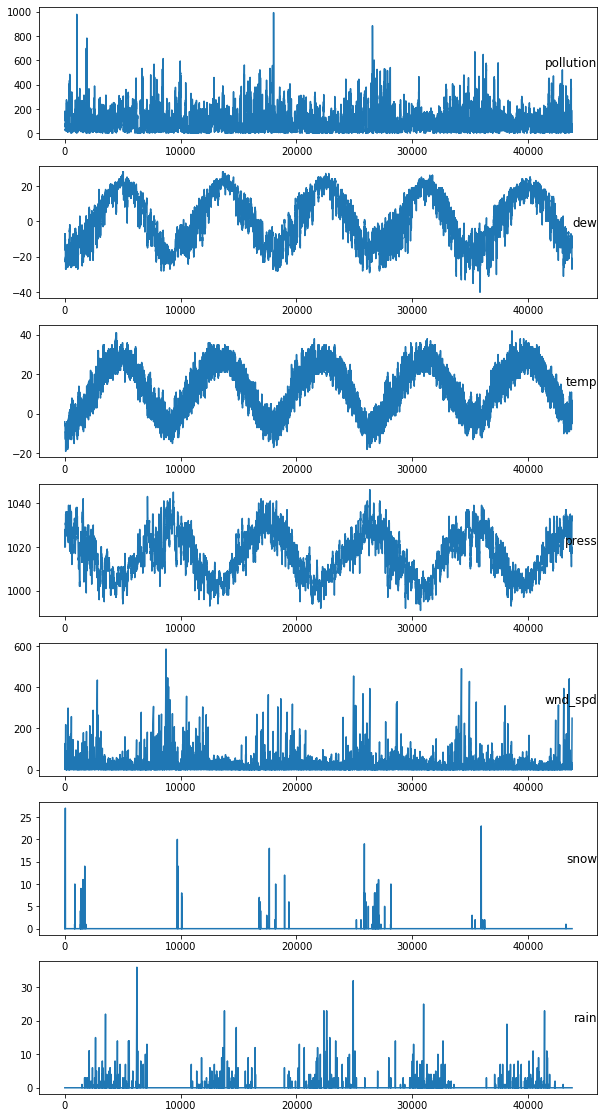

In [39]:
groups = [1,2,3,4,6,7,8]
i = 1
### plot each column 
plt.figure(figsize=(10,20))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:,group])  # 第几个字段
    plt.title(dataset.columns[group], y = 0.5, loc = 'right')
    i += 1
plt.show()

In [46]:
## 对于时序问题的回归， 当前的数据预测不但取决于当前数据， 也取决于之前的数据， 比如。 pm2.5污染指数， 当前的污染数，不但出取决于当前天气，
##下雨，下雪， 风速等， 还取决于24小时内的污染指数。 因为对于此类数据的预测， 需要进行赶时间序列转换

def series_to_supervised(data, n_in = 1, n_out = 1, drop_nan = True):
    n_vars = 1 if type(data) is list else data.shape[1]  ## data 字段数
    df = pd.DataFrame(data)                 ## 转DataFrame
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))   # 对数据进行错位移动
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]   ## 新列名称
        
    for i in range(0, n_out):
        cols.append(df.shift(-1))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]   ## 新列名称
        else:
            names += [('var%d(t+%d)' %(j+1, i)) for j in range(n_vars)]
            
    agg = pd.concat(cols, axis = 1)
    agg.columns = names
    
    if drop_nan:
        agg.dropna(inplace = True)
    
    return agg


In [47]:
temp = series_to_supervised(values, drop_nan=False)
temp

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t),var9(t)
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-01-02 01:00:00,148,-15,-4,1020,SE,2.68,0,0
1,2010-01-02 00:00:00,129,-16,-4,1020,SE,1.79,0,0,2010-01-02 02:00:00,159,-11,-5,1021,SE,3.57,0,0
2,2010-01-02 01:00:00,148,-15,-4,1020,SE,2.68,0,0,2010-01-02 03:00:00,181,-7,-5,1022,SE,5.36,1,0
3,2010-01-02 02:00:00,159,-11,-5,1021,SE,3.57,0,0,2010-01-02 04:00:00,138,-7,-5,1022,SE,6.25,2,0
4,2010-01-02 03:00:00,181,-7,-5,1022,SE,5.36,1,0,2010-01-02 05:00:00,109,-7,-6,1022,SE,7.14,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43795,2014-12-31 18:00:00,10,-22,-2,1033,NW,226.16,0,0,2014-12-31 20:00:00,10,-22,-3,1034,NW,237.78,0,0
43796,2014-12-31 19:00:00,8,-23,-2,1034,NW,231.97,0,0,2014-12-31 21:00:00,10,-22,-3,1034,NW,242.7,0,0
43797,2014-12-31 20:00:00,10,-22,-3,1034,NW,237.78,0,0,2014-12-31 22:00:00,8,-22,-4,1034,NW,246.72,0,0
43798,2014-12-31 21:00:00,10,-22,-3,1034,NW,242.7,0,0,2014-12-31 23:00:00,12,-21,-3,1034,NW,249.85,0,0
